In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 


import os
print(os.listdir("../input"))


['test_copy.xlsx']


In [2]:
X = pd.read_excel('../input/test_copy.xlsx')

In [3]:
X.groupby('projid').size()

projid
9121         8
21073        3
33027        2
130005       1
204228       9
228190       3
246264       9
285563      12
381112       5
402800       2
470212       3
482428       2
617643      12
668310       6
696418      12
701662       7
709354       8
756793       1
807897       8
985084       4
1172523      6
1179886      3
1211411      1
1237015      1
1243685      4
1250710      4
1266704      4
1393350      1
1626306      3
1674624      1
            ..
98273670     5
98322204    13
98388248    13
98430933     9
98506202     9
98625132     1
98627990    11
98844813     7
98866341     1
98919041     3
98953007     4
98993573     4
99041674     2
99110004    10
99151323     5
99210431     1
99278233     3
99367207     7
99526580    10
99592710     5
99693576    16
99718754     1
99746564     1
99750088     9
99750664     3
99809748    14
99893592     2
99911705     8
99978916     2
99982430    13
Length: 3309, dtype: int64

In [4]:
drop_col = ['study','fu_year','scaled_to']
X = X.drop(drop_col,axis=1)
print(X.shape)

(25570, 200)


In [5]:
X.groupby('dcfdx').size()
# Class rebalancing needed 
y = X['dcfdx']
# X = X.drop(['dcfdx'], axis=1)

**~ DATA CLEANING**

In [6]:
irr_features = ['cts_animals','cts_bname','cts_catflu','cts_db','cts_delay','cts_df','cts_doperf','cts_ebdr',
               'cts_ebmt','cts_fruits','cts_idea','cts_lopair','cts_mmse30','cts_nccrtd','cts_pmat',
                'cts_pmsub','cts_read_nart','cts_sdmt','cts_story','cts_stroop_cname','cts_stroop_wread',
               'cts_wli','cts_wlii','cts_wliii']
X = X.drop(irr_features, axis=1)
X.head(3)

projid  anemia_who       ...        urinary_antispas_rx  urinary_inc_rx
0    9121         0.0       ...                        0.0             0.0
1    9121         NaN       ...                        0.0             0.0
2    9121         0.0       ...                        0.0             0.0

[3 rows x 176 columns]

In [7]:
irr_features_2 = ['confid_instit','finfintot','finhlthtot','finuctot','fraud7','scam','gamma','large_alpha',
                 'risk','fin_literacy_pct','health_literacy_pct','literacy_total_pct','iadlsum','katzsum',
                 'rosbscl','rosbsum','biketime','caltime','othrtime','phys5itemsum','swimtime','walktime',
                 'yardtime']
X = X.drop(irr_features_2, axis=1)
X.head(3)

projid  anemia_who       ...        urinary_antispas_rx  urinary_inc_rx
0    9121         0.0       ...                        0.0             0.0
1    9121         NaN       ...                        0.0             0.0
2    9121         0.0       ...                        0.0             0.0

[3 rows x 153 columns]

In [8]:
med_irr_features = ['small_alpha','med_con_sum_cum','vasc_3dis_sum','vasc_risks_sum','dental_rx','co2','mch','mchc',
                    'endocrine_rx','gastrointestinal_rx','dermatologic_rx','musculoskeletal_rx','ophthalmic_rx',
                    'otic_rx','macronutrient_rx','micronutrient_rx','multivitamin_rx','fish_oil_supplement_rx',
                   'respiratory_rx','supplement_rx','urinary_rx','acetaminophen_rx','anti_inflammatory_rx',
                   'antimalarial_rx','aspirin_rx','glucocortico_rx','opioid_rx','antiinfective_rx',
                   'anteandr_cent_rx','anteandr_periph_rx','antiadrenergics_rx','beta_block_rx',
                    'calcium_channel_block_rx','direct_renin_inhibitor_rx','diuretic_plusbp_rx','diuretic_pure_rx',
                   'other_antihyp_rx','take_arbs_rx','diabetes_insulin_rx','diabetes_noninsulin_rx',
                    'vitamin_minerals_rx','benign_pros_hyper_rx','glucosamine_rx','estrogen_vaginal_rx',
                   'urinary_antispas_rx','hdlratio','rdw','hemacrit','cogn_ep',
                   'cogn_po','cogn_ps','cogn_se','cogn_wo','cogn_global']
X = X.drop(med_irr_features, axis=1)
X.head(3)

projid  anemia_who       ...        fivehtblocker_rx  urinary_inc_rx
0    9121         0.0       ...                     0.0             0.0
1    9121         NaN       ...                     0.0             0.0
2    9121         0.0       ...                     0.0             0.0

[3 rows x 99 columns]

In [9]:
rem = []
for c in X.columns:
    if X[c].std == 0:
        rem.append(c)
        
X = X.drop(rem, axis=1)
print(rem)

[]


In [10]:
final_del = ['fasting','confid_health','tot_meds_cnt']
X = X.drop(final_del, axis=1)
X.head(3)

projid  anemia_who       ...        fivehtblocker_rx  urinary_inc_rx
0    9121         0.0       ...                     0.0             0.0
1    9121         NaN       ...                     0.0             0.0
2    9121         0.0       ...                     0.0             0.0

[3 rows x 96 columns]

*~ Removing category 6 in dcfdx column*

In [11]:
index_6 = []
ct = 0
for i in X.dcfdx:
    if i == 6:
        index_6.append(ct)
    ct = ct + 1
X = X.drop(index_6)

In [12]:
X.groupby('dcfdx').size()

dcfdx
1.0    16936
2.0     4963
3.0      184
4.0     2590
5.0      315
dtype: int64

In [13]:
p = X.loc[:, 'projid':'bmi']
q = X.loc[:, 'hypertension_cum':'urinary_inc_rx']
print(p.shape, q.shape)

(25422, 24) (25422, 72)


**~ IMPUTATION**  

Filling up missing values! 
Using k-NN

In [14]:
from fancyimpute import KNN
X_fill = KNN(k=4).fit_transform(X)

Using TensorFlow backend.


Imputing row 1/25422 with 1 missing, elapsed time: 302.868
Imputing row 101/25422 with 0 missing, elapsed time: 302.911
Imputing row 201/25422 with 0 missing, elapsed time: 302.982
Imputing row 301/25422 with 0 missing, elapsed time: 303.025
Imputing row 401/25422 with 0 missing, elapsed time: 303.055
Imputing row 501/25422 with 0 missing, elapsed time: 303.111
Imputing row 601/25422 with 1 missing, elapsed time: 303.170
Imputing row 701/25422 with 20 missing, elapsed time: 303.221
Imputing row 801/25422 with 1 missing, elapsed time: 303.287
Imputing row 901/25422 with 0 missing, elapsed time: 303.350
Imputing row 1001/25422 with 0 missing, elapsed time: 303.445
Imputing row 1101/25422 with 1 missing, elapsed time: 303.487
Imputing row 1201/25422 with 21 missing, elapsed time: 303.703
Imputing row 1301/25422 with 21 missing, elapsed time: 303.943
Imputing row 1401/25422 with 21 missing, elapsed time: 304.131
Imputing row 1501/25422 with 21 missing, elapsed time: 304.332
Imputing row 16

In [15]:
X_fill = pd.DataFrame(data=X_fill)
X_fill.columns = X.columns
X_fill.isnull().any().sum()

0

In [16]:
X_t = pd.DataFrame(data=X_fill)
y_t = pd.DataFrame(data=X_fill['projid'])
X_t.head(3)

projid  anemia_who       ...        fivehtblocker_rx  urinary_inc_rx
0  9121.0         0.0       ...                     0.0             0.0
1  9121.0         0.0       ...                     0.0             0.0
2  9121.0         0.0       ...                     0.0             0.0

[3 rows x 96 columns]

In [17]:
import math
ct = 0
idx = []
for i in X_fill['dcfdx']:
    if int(i) != i:
        idx.append(ct)
    ct+=1
for i in idx:
    p = X_fill['dcfdx'][i]
    X_fill['dcfdx'][i] = math.ceil(p)
X_fill.dcfdx.value_counts()

1.0    17018
2.0     5154
4.0     2675
5.0      357
3.0      218
Name: dcfdx, dtype: int64

*~ Mapping 1,2,3 as Non-Alzheimer's and 4,5 as Alzheimer's[](http://)
*

In [18]:
X_fill['dcfdx'] = X_fill['dcfdx'].map({1:0, 2:0 ,3:0 ,4:1, 5:1})
X_fill.dcfdx.value_counts()

0    22390
1     3032
Name: dcfdx, dtype: int64

In [19]:
z = pd.DataFrame(data=X_fill.groupby(['projid']).dcfdx.mean())
ct = 0
a = z.index
idx = []
for i in z.dcfdx:
    if int(i) != i:
        idx.append(a[ct])
    ct+=1
indices = [ix for ix in X_fill.index if X_fill.projid[ix] in idx]
len(indices)

8033

*~ Take the last follow up year of every patient for analysis*

In [20]:
#X_fill = X_fill.drop(indices)
#X_fill.groupby('dcfdx').size()
ct = 0
ct_id = 9121
index_to_retain = []
for i in X_fill.projid:
    if ct_id != i:
        index_to_retain.append(ct-1)
        ct_id = i
    ct+=1
index_t = list(X_fill.index)
index_to_drop = list(set(index_t) - set(index_to_retain))

X_fill = X_fill.drop(index_to_drop)
X_fill.shape

(3305, 96)

In [21]:
X_fill.dcfdx.value_counts()

0    2449
1     856
Name: dcfdx, dtype: int64

In [22]:
y_fill = pd.DataFrame(data=X_fill['dcfdx'])
X_fill = X_fill.drop(['projid'], axis=1)

In [23]:
X_fill['anemia_who'] = X_fill['anemia_who'].astype(int)

In [24]:
p = X_fill.loc[:, 'anemia_who':'bmi']
q = X_fill.loc[:, 'hypertension_cum':'urinary_inc_rx']
q = q.astype(int)

In [25]:
X_fill = pd.concat([p,q], ignore_index=False, sort=False, axis=1)

**~ DATA BALANCING**

**over-sampling and under-sampling** - 
The main motivation behind the need to preprocess imbalanced data 
before we feed them into a classifier is that typically classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. 

**tomek-links** - 
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

> We will now balance our classes wrt to column 'dcfdx'
which predicts the Alzheimer's from non-Alzheimer'.

> Most obvious procedure will be UnderSampling the data to balance the classes as our
target is not to add any dummy patients. For that we can use Simple UnderSampling or 
TokemLinks.

In [26]:
X_t = pd.DataFrame(data=X_fill)
y_t = pd.DataFrame(data=y_fill)
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, ratio='not majority')
X_sm, y_sm = smote.fit_sample(X_t, y_t)

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [27]:
y_sm = pd.DataFrame(data=y_sm)
y_sm.columns = y_t.columns
y_sm.head()

print(X_sm.shape, y_sm.shape)

(4898, 95) (4898, 1)


In [28]:
from imblearn.under_sampling import RandomUnderSampler

tl = RandomUnderSampler(random_state=42,ratio='majority')
X_tl, y_tl = tl.fit_sample(X_t, y_t)

In [29]:
y_tl = pd.DataFrame(data=y_tl)
y_tl.columns = y_t.columns
y_tl.head()

print(X_tl.shape, y_tl.shape)

(1712, 95) (1712, 1)


In [30]:
X_sm = pd.DataFrame.from_records(X_sm)
X_sm.columns = X_t.columns
y_sm = pd.DataFrame.from_records(y_sm)
y_sm.columns = y_sm.columns

X_tl = pd.DataFrame.from_records(X_tl)
X_tl.columns = X_t.columns
y_tl = pd.DataFrame.from_records(y_tl)
y_tl.columns = y_t.columns

In [31]:
print(y_sm.groupby('dcfdx').size(),y_tl.groupby('dcfdx').size())

dcfdx
0    2449
1    2449
dtype: int64 dcfdx
0    856
1    856
dtype: int64


In [32]:
X_nn = pd.DataFrame(data=X_sm)
y_nn = pd.DataFrame(data=y_sm)
X_nn = X_nn.drop(['dcfdx'], axis=1)
X_nn.shape

(4898, 94)

In [33]:
X_new = pd.DataFrame(data=X_tl)
y_new = pd.DataFrame(data=y_tl)
X_new = X_new.drop(['dcfdx'], axis=1)
X_new.head()

anemia_who        bun       ...        fivehtblocker_rx  urinary_inc_rx
0         1.0  30.000000       ...                     0.0             1.0
1         0.0  14.000000       ...                     0.0             0.0
2         0.0  20.000014       ...                     0.0             0.0
3         1.0  25.000000       ...                     0.0             0.0
4         0.0  13.628549       ...                     0.0             1.0

[5 rows x 94 columns]

**~ Scaling** 

Method Used - MinMaxScaler

In [34]:
p = X_new.loc[:, 'anemia_who':'bmi']
q = X_new.loc[:, 'hypertension_cum':'urinary_inc_rx']

*Converting age into perfect int value after scaling*

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p_df = pd.DataFrame(scaler.fit_transform(p))
p_df.columns = p.columns

#ct = 0
#z = X_new['age_at_visit']
#for i in p_df['age_at_visit']:
#    p_df['age_at_visit'][ct] = int(z[ct])
#    ct+=1
#p_df.head(3)

In [36]:
X_new = pd.concat([p_df,q], ignore_index=False, sort=False, axis=1)
X_new.head(2)

anemia_who       bun       ...        fivehtblocker_rx  urinary_inc_rx
0         1.0  0.250000       ...                     0.0             1.0
1         0.0  0.083333       ...                     0.0             0.0

[2 rows x 94 columns]

In [37]:
pnn = X_nn.loc[:, 'anemia_who':'bmi']
qnn = X_nn.loc[:, 'hypertension_cum':'urinary_inc_rx']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p_dfn = pd.DataFrame(scaler.fit_transform(pnn))
p_dfn.columns = pnn.columns
X_nn = pd.concat([p_dfn,qnn], ignore_index=False, sort=False, axis=1)
X_nn.head(2)

anemia_who       bun       ...        fivehtblocker_rx  urinary_inc_rx
0         0.0  0.083333       ...                     0.0             0.0
1         0.0  0.250000       ...                     0.0             0.0

[2 rows x 94 columns]

**~ DATA CORRELATION**

In [38]:
#X_new = X_new.drop('dcfdx',axis=1)
data = X_new.loc[:,'bun':'bmi']
#data = data.drop('dcfdx',axis=1)
size = (len(data.columns))
cols = data.columns

# pearson coefficient
data_corr = data.corr()
threshold = 0.5
corr_list = []

for i in range(0,size):
    for j in range(i+1,size):
        if(data_corr.iloc[i,j]>=threshold and data.iloc[i,j]<1) or (data_corr.iloc[i,j]<0 and
                                                                   data_corr.iloc[i,j]<= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j])

scorr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

for i,j,k in scorr_list:
    print("%s and %s = %.2f" % (cols[j],cols[k],i))


chlstrl and ldlchlstrl = 0.90
hemoglbn and rbc = 0.83
crn and gfr_mdrs = -0.69
cl and na = 0.68
bun and crn = 0.65
bun and gfr_mdrs = -0.60
glucose and hba1c = 0.53


**~ DATA VISUALIZATION**

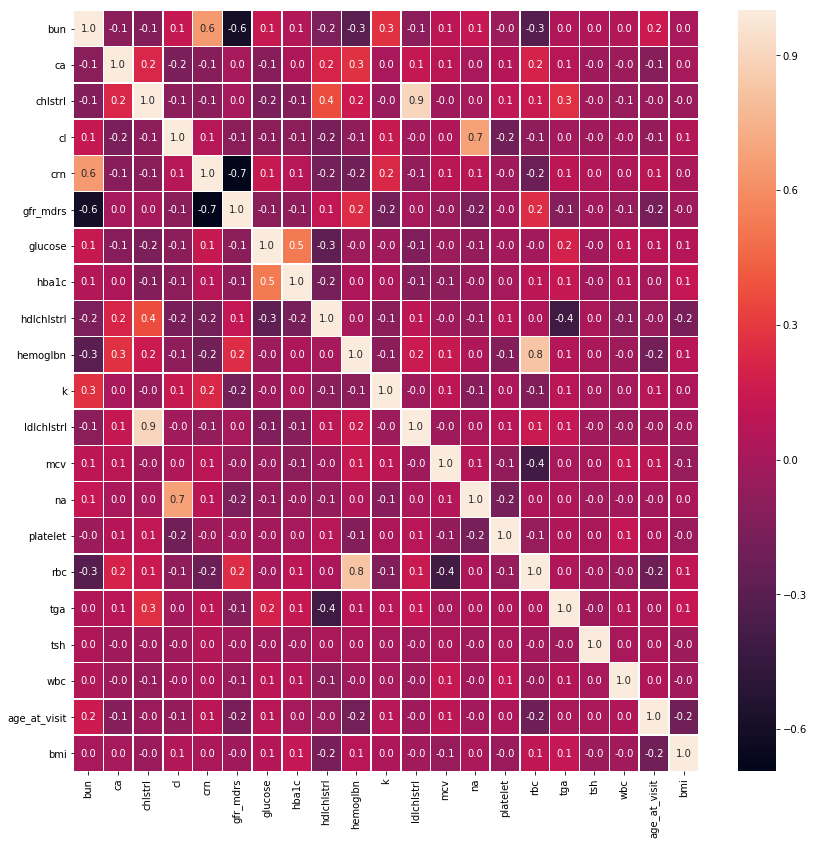

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

#for v,i,j in scorr_list:
#    sns.pairplot(X_new, hue="dcfdx", height=2, x_vars=cols[i], y_vars=cols[j])
#    plt.show()

f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(data_corr, annot=True, linewidths=0.5, fmt='.1f', ax=ax)

**~ Data leakage** - column ad_rx

In [40]:
drop_col = ['ad_rx']
X_new = X_new.drop(drop_col, axis=1)

In [41]:
X_nn = X_nn.drop(['ad_rx'], axis=1)

**~ Feature Selection **

1. Univariate feature selection - SelectKBest (Chi2, f_classif)
2. Recursive Feature Elimination (model-RandomForest)
3. Recursive Feature Elimination with crossvalidation (model-RandomForest)
4. Select From Model (Tree-based, L1-based)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

> SelectKBest

In [43]:
# SelectKBest - we will be considering the best 20 categorical features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

p_df_train = x_train.loc[:, 'hypertension_cum':'urinary_inc_rx']

X_chi2 =  SelectKBest(chi2, k=20).fit(p_df_train,y_train)
X_f_classif = SelectKBest(f_classif, k=20).fit(p_df_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [65] are constant.
  UserWarning)


In [44]:
print("Score list chi2:", X_chi2.scores_)
print("Score list f_classif:", X_f_classif.scores_)
print("Columns:", p_df_train.columns)

Score list chi2: [4.91039491e-01 1.63890071e+01 3.26207571e-02 2.10768488e-02
 5.24972462e-01 8.62770237e-01 1.48213265e+00 1.54131540e+00
 2.06805932e+01 8.01582545e-02 8.92928122e+00 5.24310432e-01
 4.31385118e-01 7.18678503e+00 8.26380086e-01 1.78658870e+01
 3.09079914e+01 7.04948284e+01 1.17456627e+00 1.01006711e+00
 2.09715652e+00 3.13533078e+00 8.52495709e-01 3.56692238e+00
 6.65096849e-01 1.15527973e+01 1.23927978e+00 7.22583503e-01
 5.70340476e-01 2.70441509e-01 1.28974823e+00 1.18330477e+00
 2.14094066e-03 2.72798848e+00 1.55583213e+00 1.36067585e+00
 1.90928738e-01 7.34861334e+01 9.63399234e-01 1.90142142e-01
 2.70787660e+00 3.48089032e+00 1.69137973e+01 1.10472574e+01
 1.14094809e+00 1.98006645e+00 5.85252452e+01 4.39006298e+01
 5.99136650e-02 7.67910605e-01 1.98780095e+00 4.09562279e-02
 2.72798848e+00 4.89435601e+00 1.27806277e+01 8.36024593e-01
 3.17191113e-01 2.40808045e-03 3.65438512e+00 2.01308941e-03
 1.23249525e+01 1.67480576e+01 4.72098484e+00 1.13785265e-02
 4.7063

> RFE

In [45]:
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=40, step=1)
rfe = rfe.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print('Chosen best 40 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 40 feature by rfe: Index(['bun', 'ca', 'chlstrl', 'cl', 'crn', 'gfr_mdrs', 'glucose', 'hba1c',
       'hdlchlstrl', 'hemoglbn', 'k', 'ldlchlstrl', 'mcv', 'na', 'platelet',
       'rbc', 'tga', 'tsh', 'wbc', 'age_at_visit', 'bmi', 'hypertension_cum',
       'cancer_cum', 'heart_cum', 'stroke_cum', 'analgesic_rx',
       'antihyp_all_rx', 'lipid_lowering_rx', 'mental_health_rx',
       'neurologic_rx', 'plateletinhibitor_rx', 'antihyp_rx', 'diuretic_rx',
       'laxative_rx', 'statin_rx', 'antipsychotic_rx', 'depression_rx',
       'alternative_rx', 'mineral_rx', 'vitamin_rx'],
      dtype='object')


> RFECV

In [47]:
from sklearn.feature_selection import RFECV

clf = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 87
Best features : Index(['anemia_who', 'bun', 'ca', 'chlstrl', 'cl', 'crn', 'gfr_mdrs',
       'glucose', 'hba1c', 'hdlchlstrl', 'hemoglbn', 'k', 'ldlchlstrl', 'mcv',
       'na', 'platelet', 'rbc', 'tga', 'tsh', 'wbc', 'age_at_visit', 'bmi',
       'hypertension_cum', 'cancer_cum', 'dm_cum', 'headinjrloc_cum',
       'thyroid_cum', 'chf_cum', 'claudication_cum', 'heart_cum', 'stroke_cum',
       'analgesic_rx', 'antibiotic_rx', 'antihyp_all_rx', 'antineoplastic_rx',
       'cardiac_rx', 'hemotologic_rx', 'lipid_lowering_rx', 'mental_health_rx',
       'neurologic_rx', 'plateletinhibitor_rx', 'aceinhibitor_rx',
       'antihyp_rx', 'diuretic_rx', 'antianginal_rx', 'antiarrhythmic_rx',
       'cardiacglycoside_rx', 'antihormone_rx', 'diabetes_rx', 'estrogens_rx',
       'thyroid_replacement_rx', 'antacid_rx', 'antinausea_rx',
       'antireflux_rx', 'h2blocker_rx', 'laxative_rx', 'ppi_rx',
       'anticoagulant_rx', 'hematopoietic_rx', 'lipid_lowering_nonst

> Tree Based Selection

In [48]:
clf_t = RandomForestClassifier(random_state=42).fit(x_train, y_train)
importances = clf_t.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_t.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

list_col = []
for f in range(x_train.shape[1]):
    list_col.append(indices[f])
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [49]:
print("Top 40 Features:")
zz = x_train.columns
ct = 0
for i in list_col:
    print(zz[i])
    if ct >= 50:
        break
    ct+=1

Top 40 Features:
age_at_visit
bmi
hemoglbn
glucose
platelet
neurologic_rx
ldlchlstrl
wbc
hdlchlstrl
tga
na
k
hba1c
rbc
crn
mcv
laxative_rx
chlstrl
cl
gfr_mdrs
tsh
bun
ca
depression_rx
antipsychotic_rx
stroke_cum
cancer_cum
mental_health_rx
lipid_lowering_rx
vitamin_rx
antihyp_rx
statin_rx
analgesic_rx
antireflux_rx
mineral_rx
thyroid_cum
aceinhibitor_rx
diabetes_rx
antihyp_all_rx
anticoagulant_rx
hypertension_cum
dm_cum
cardiacglycoside_rx
antibiotic_rx
antiasthmatic_rx
park_rx
anticonvulsant_rx
diuretic_rx
antacid_rx
heart_cum
nutrient_rx


> List of Final Features

In [50]:
# Method used - RFECV
final_features = ['bun', 'ca', 'chlstrl', 'cl', 'crn', 'gfr_mdrs', 'glucose', 'hba1c',
       'hdlchlstrl', 'hemoglbn', 'k', 'ldlchlstrl', 'mcv', 'na', 'platelet',
       'rbc', 'tga', 'tsh', 'wbc', 'age_at_visit', 'bmi', 'hypertension_cum',
       'cancer_cum', 'stroke_cum', 'analgesic_rx','antianxiety_rx',
       'antibiotic_rx', 'lipid_lowering_rx','mental_health_rx','thyroid_cum',
       'mental_health_rx', 'neurologic_rx', 'antihyp_rx', 'antireflux_rx',
       'laxative_rx', 'statin_rx', 'antipsychotic_rx', 'depression_rx',
       'alternative_rx', 'vitamin_rx']
drop_cols_list = list(set(zz) - set(final_features))
print(len(drop_cols_list))

54


In [51]:
X_new = X_new.drop(drop_cols_list, axis=1)
X_new.shape

(1712, 39)

In [52]:
X_nn = X_nn.drop(drop_cols_list, axis=1)
X_nn.shape

(4898, 39)

*~ Keeping a test data for final prediction - Tune the hyperparameters*

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

**~ Analysis of each feature with target variable**

In [54]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [55]:
%matplotlib inline
import time
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_curve, auc, roc_auc_score


model_start = time.time()
roc_list = []
fpr_list = []
tpr_list = []

for i in final_features:
    train_x = pd.DataFrame(data=x_train1[i])
    test_x = pd.DataFrame(data=x_test1[i])
    
    model = CatBoostClassifier(loss_function="Logloss",
                               eval_metric="AUC",
                               iterations=4000,
                               learning_rate=0.01,
                               random_state=42,
                               depth=8,
                               task_type="GPU")
    #early_stopping_rounds=2500
    #od_type="Iter"
    
    pool = Pool(train_x, label=y_train1)
    fit_model = model.fit(pool)
    y_pred = fit_model.predict(test_x)
    preds = [round(val) for val in y_pred]
    fpr, tpr, thresholds = roc_curve(preds, y_test1)
    roc_auc = roc_auc_score(y_test1, preds)
    roc_list.append(roc_auc)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    #print(i)
    
model_end = time.time()
print("Time Taken:", model_end - model_start)

0:	learn: 0.5314101	total: 118ms	remaining: 7m 53s
1:	learn: 0.5427328	total: 220ms	remaining: 7m 19s
2:	learn: 0.5905619	total: 322ms	remaining: 7m 8s
3:	learn: 0.5980542	total: 423ms	remaining: 7m 3s
4:	learn: 0.6033338	total: 527ms	remaining: 7m 1s
5:	learn: 0.6007458	total: 628ms	remaining: 6m 58s
6:	learn: 0.6023763	total: 730ms	remaining: 6m 56s
7:	learn: 0.6037263	total: 830ms	remaining: 6m 54s
8:	learn: 0.6037759	total: 932ms	remaining: 6m 53s
9:	learn: 0.6046990	total: 1.03s	remaining: 6m 52s
10:	learn: 0.6046516	total: 1.13s	remaining: 6m 51s
11:	learn: 0.6063446	total: 1.24s	remaining: 6m 50s
12:	learn: 0.6037091	total: 1.34s	remaining: 6m 50s
13:	learn: 0.6061742	total: 1.44s	remaining: 6m 49s
14:	learn: 0.6062734	total: 1.54s	remaining: 6m 50s
15:	learn: 0.6081519	total: 1.65s	remaining: 6m 49s
16:	learn: 0.6129872	total: 1.75s	remaining: 6m 49s
17:	learn: 0.6164983	total: 1.85s	remaining: 6m 48s
18:	learn: 0.6176910	total: 1.95s	remaining: 6m 48s
19:	learn: 0.6168348	tota

> Plots

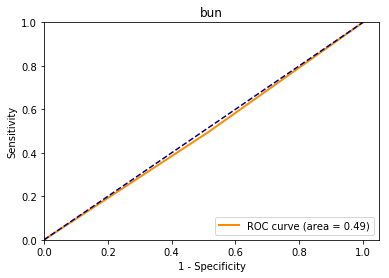

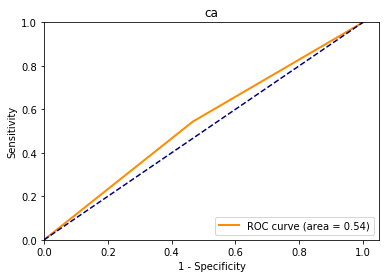

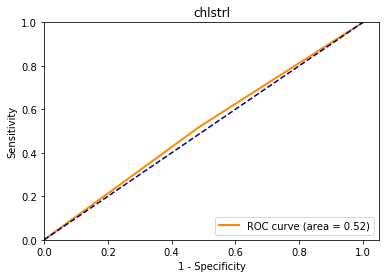

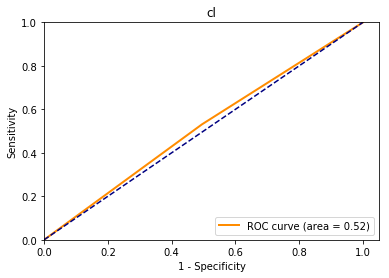

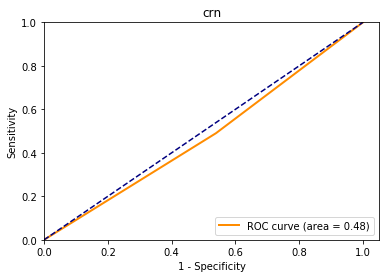

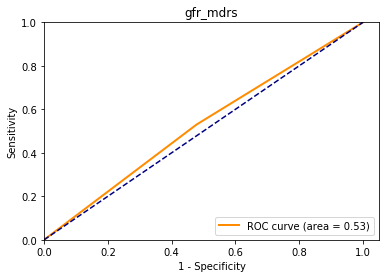

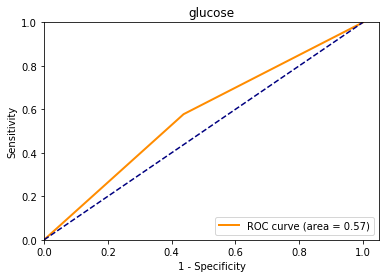

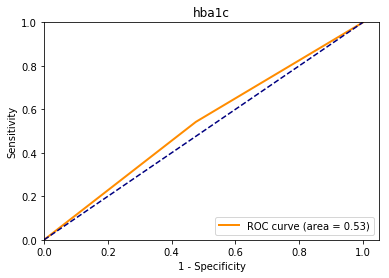

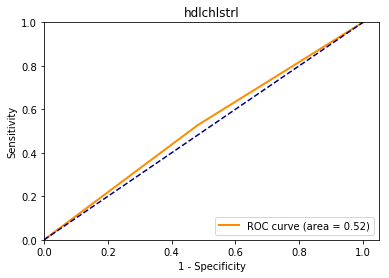

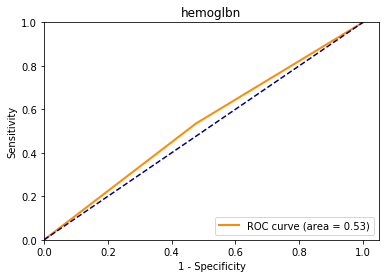

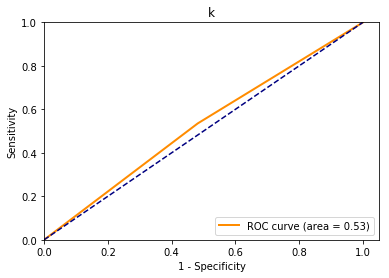

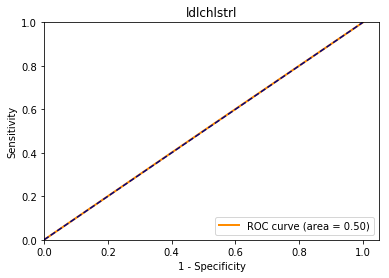

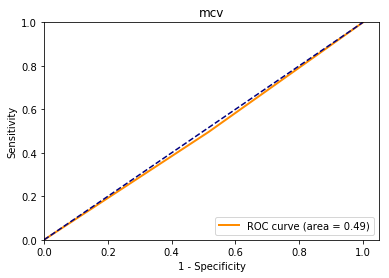

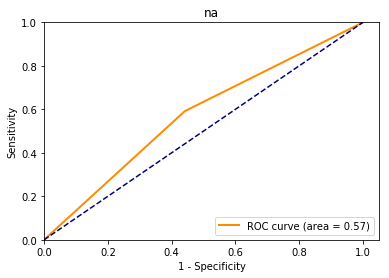

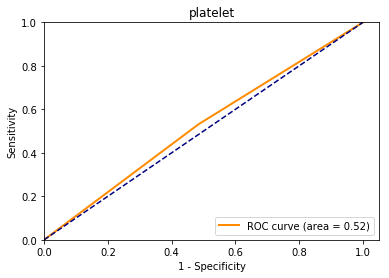

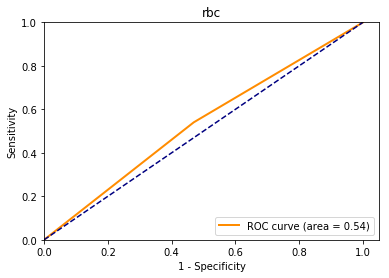

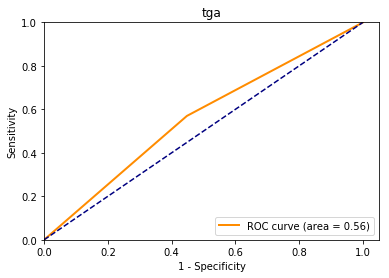

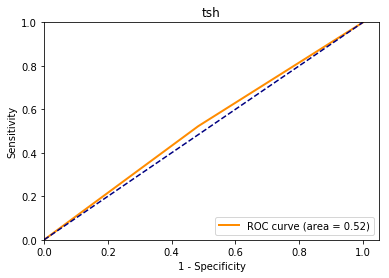

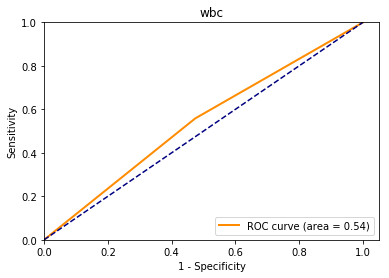

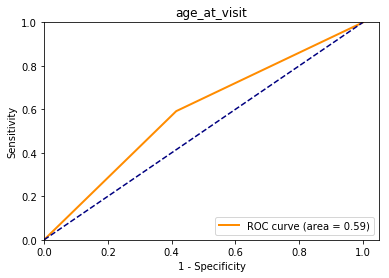

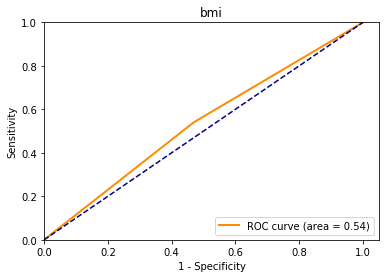

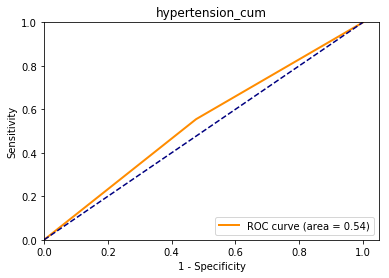

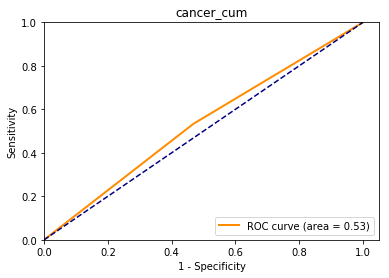

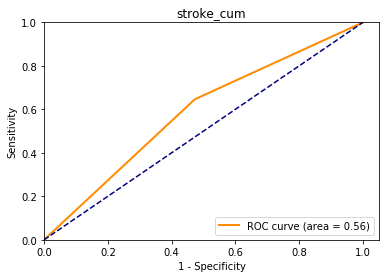

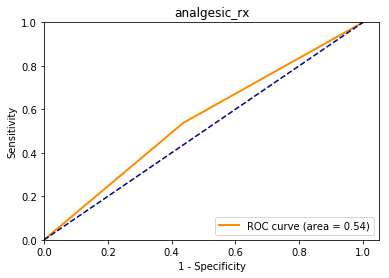

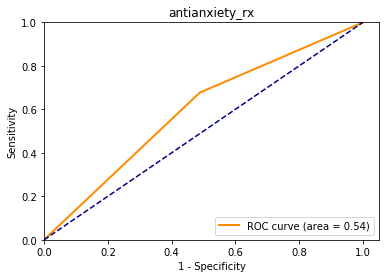

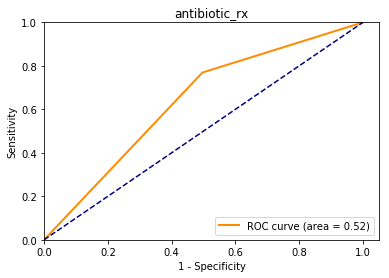

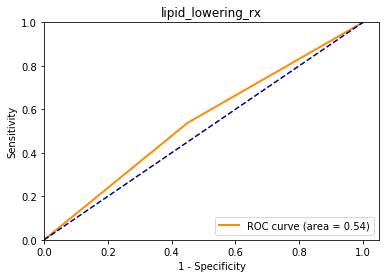

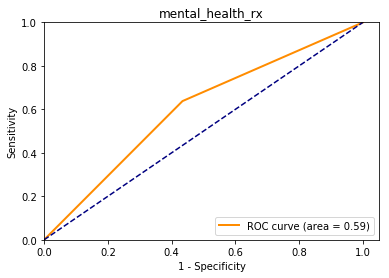

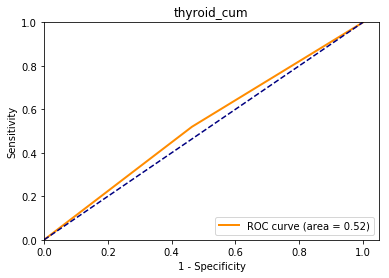

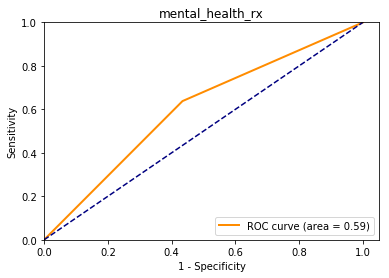

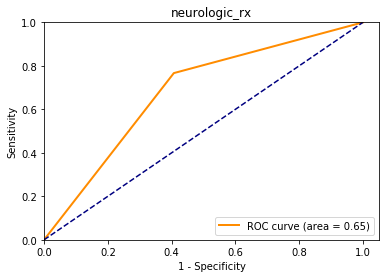

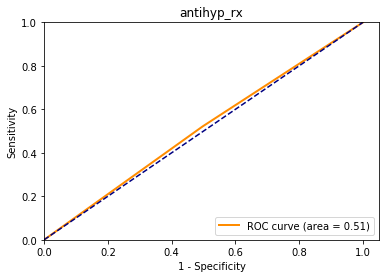

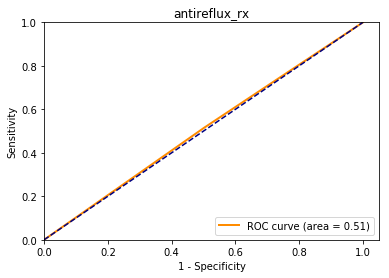

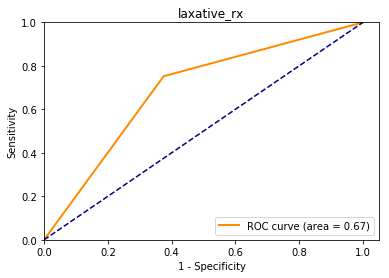

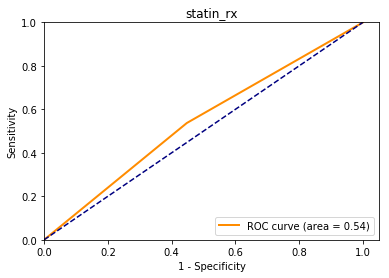

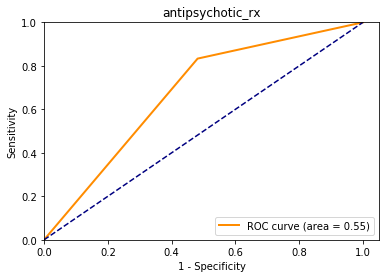

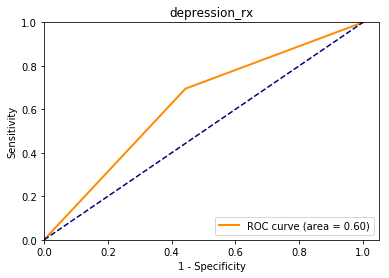

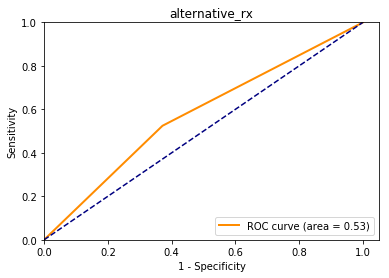

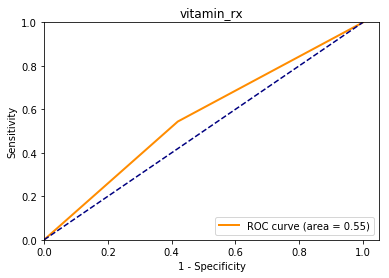

In [56]:
import matplotlib.pyplot as plt
count_t = 0

for i in final_features:
    
    roc_auc = roc_list[count_t]
    fpr = fpr_list[count_t]
    tpr = tpr_list[count_t]
    count_t+=1
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(i)
    plt.legend(loc="lower right")
    plt.show()

> Categorizing features based on roc_auc_score

In [57]:
pred_roc = []
unpred_roc = []
partialpred_roc = []
count_t = 0

for i in final_features:
    if roc_list[count_t] > 0.5:
        pred_roc.append(i)
    elif roc_list[count_t] <= 0.5 and roc_list[count_t] > 0:
        partialpred_roc.append(i)
    else:
        unpred_roc.append(i)
    count_t += 1
print("Roc > 0.5",pred_roc)
print("Roc <= 0.5",partialpred_roc)
print("Cannot calculate roc", unpred_roc)

Roc > 0.5 ['ca', 'chlstrl', 'cl', 'gfr_mdrs', 'glucose', 'hba1c', 'hdlchlstrl', 'hemoglbn', 'k', 'ldlchlstrl', 'na', 'platelet', 'rbc', 'tga', 'tsh', 'wbc', 'age_at_visit', 'bmi', 'hypertension_cum', 'cancer_cum', 'stroke_cum', 'analgesic_rx', 'antianxiety_rx', 'antibiotic_rx', 'lipid_lowering_rx', 'mental_health_rx', 'thyroid_cum', 'mental_health_rx', 'neurologic_rx', 'antihyp_rx', 'antireflux_rx', 'laxative_rx', 'statin_rx', 'antipsychotic_rx', 'depression_rx', 'alternative_rx', 'vitamin_rx']
Roc <= 0.5 ['bun', 'crn', 'mcv']
Cannot calculate roc []


> Split test and train data

In [58]:
from sklearn.model_selection import train_test_split

x_tn, x_ten, y_tn, y_ten = train_test_split(X_nn, y_nn, test_size=0.25, random_state=42)

In [59]:
from sklearn.model_selection import train_test_split

x_tn1, x_ten1, y_tn1, y_ten1 = train_test_split(x_tn, y_tn, test_size=0.2, random_state=42)

**~ Models**
1. Logistic Regression

    * Train Test Split    
    * KFold Cross-validation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

logreg = LogisticRegression(random_state=42, solver='saga')
logreg.fit(x_tn,np.ravel(y_tn))
y_pr = logreg.predict(x_ten)
y_pred = [round(value) for value in y_pr]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)

print('Train/Test split result:')
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Train/Test split result:
Accuracy is 0.784
Recall is 0.787
Precision is 0.795
Roc_auc_score is 0.784
Confusion Matrix :
[[461 129]
 [135 500]]


In [61]:
from sklearn.model_selection import cross_val_score, KFold

logregCV = LogisticRegression(random_state=42, solver='saga')
kfold = KFold(n_splits=5)
res = cross_val_score(logregCV, x_train,np.ravel(y_train), scoring="accuracy", cv=kfold)
print("Average Accuracy is %2.3f" % res.mean())

Average Accuracy is 0.745


2. NaiveBayes

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_tn,np.ravel(y_tn))
y_pr = gnb.predict(x_ten)
y_pred = [round(value) for value in y_pr]
conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)

print('Train/Test split result:')
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Train/Test split result:
Accuracy is 0.758
Recall is 0.720
Roc_auc_score is 0.760
Precision is 0.795
Confusion Matrix :
[[472 118]
 [178 457]]


3. Random Forest Classifier - with GridSearchCV

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 6, 8, 10, 30, 50, 70, 100],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'n_estimators': [100, 200, 300, 500, 1000, 2000]
}
rfc = RandomForestClassifier(random_state=42)
rfc_mod = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2)

rfc_mod.fit(x_tn, np.ravel(y_tn))
#print("Best Parameters: ",model.best_params_)
print("Best estimator: ",rfc_mod.best_estimator_)
#print("Highest Accuracy obtained: ",model.best_score_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 26.7min finished


Best estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [64]:
y_pr = rfc_mod.best_estimator_.predict(x_ten)
y_pred = [round(value) for value in y_pr]
conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.883
Recall is 0.828
Precision is 0.939
Roc_auc_score is 0.885
Confusion Matrix :
[[556  34]
 [109 526]]


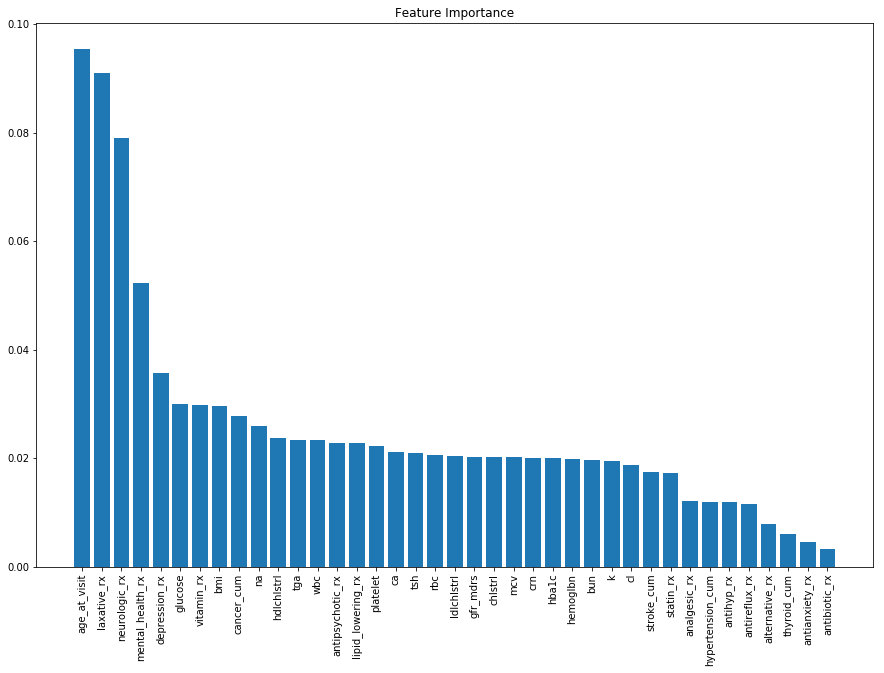

In [65]:
import matplotlib.pyplot as plt

feats = x_ten.columns
importances = rfc_mod.best_estimator_.feature_importances_


indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feats[i] for i in indices]

# Create plot
plt.figure(figsize=(15, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x_tn.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_tn.shape[1]), names, rotation=90)

# Show plot
plt.show()

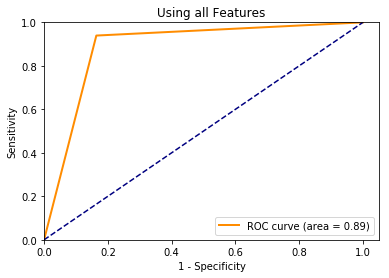

In [66]:
fpr, tpr, thresholds = roc_curve(y_pred, np.ravel(y_ten))
roc_auc = roc_auc_score(np.ravel(y_ten), y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Using all Features')
plt.legend(loc="lower right")
plt.show()

4. Gradient Boosting Classifier 

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

#param = {
#         'n_estimators': [100, 300, 500, 800, 1000, 1500, 2000],
#         'max_depth': [2, 6, 8, 10, 30, 50, 70, 100],
#         'min_samples_leaf': [1, 2, 4, 6, 8],
#         'min_sample_split': [2, 6, 8, 10],
#         'learning_rate': [0.01,0.05,0.1,0.2,0.5,1,2]
#}
# From tuning hyperparameters
model = GradientBoostingClassifier(n_estimators=2000,
                                 learning_rate=0.01,
                                 max_depth=8,
                                 min_samples_split=2,
                                 random_state=41) 

#model = GridSearchCV(estimator=gbm, param_grid=param,
#                           cv=3, n_jobs=-1,verbose=2)

model.fit(x_tn, np.ravel(y_tn))
#print("Best Parameters: ",model.best_params_)
#print("Highest Accuracy obtained: ",model.best_score_)

y_pr = model.predict(x_ten)
y_pred = [round(value) for value in y_pr]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.870
Recall is 0.817
Precision is 0.923
Roc_auc_score is 0.872
Confusion Matrix :
[[547  43]
 [116 519]]


5. LightGBM - Hyperparameter Tuning with RandomSearchCV and GridSearchCV

In [68]:
import lightgbm as lgb
#from bayes_opt import BayesianOptimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

fit_params={"early_stopping_rounds": 30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_ten1, np.ravel(y_ten1))],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': False,
            'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(2, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1]}

clf = LGBMClassifier(objective='binary',max_depth=-1,random_state=42,
                     silent=True, metric='None', n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=42,
    verbose=False)

In [69]:
gs.fit(x_tn1, np.ravel(y_tn1), **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Best score reached: 0.9367716097083177 with params: {'colsample_bytree': 0.4242601537230588, 'learning_rate': 0.05, 'min_child_samples': 141, 'min_child_weight': 0.01, 'num_leaves': 33, 'reg_alpha': 10, 'reg_lambda': 0, 'subsample': 0.45148478486106136} 


In [70]:
clf_sw = LGBMClassifier(**clf.get_params())
clf_sw.set_params(**gs.best_params_)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.4242601537230588, importance_type='split',
               learning_rate=0.05, max_depth=-1, metric='None',
               min_child_samples=141, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=5000, n_jobs=-1, num_leaves=33, objective='binary',
               random_state=42, reg_alpha=10, reg_lambda=0, silent=True,
               subsample=0.45148478486106136, subsample_for_bin=200000,
               subsample_freq=0)

In [71]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [72]:
gs_sample_weight.fit(x_tn1, np.ravel(y_tn1), **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.3s finished


Best score reached: 0.9367716097083177 with params: {'scale_pos_weight': 1} 


In [73]:
y_pr = gs_sample_weight.best_estimator_.predict(x_ten)
y_pred = [round(value) for value in y_pr]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.864
Recall is 0.808
Precision is 0.921
Roc_auc_score is 0.867
Confusion Matrix :
[[546  44]
 [122 513]]


> LightGBM Further optimized!

In [74]:
import lightgbm as lgb

def lgb_model(trn_x, trn_y, val_x, val_y, test, verbose) :

    params = {'objective':'binary',
         'num_leaves' : 30,
         'min_data_in_leaf' : 20,
         'max_depth' : 8,
         'learning_rate': 0.004,
         #'min_child_samples':100,
         'feature_fraction':0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         'lambda_l1': 0.2,
         "bagging_seed": 42,
         "metric": 'auc',
         #'subsample':.8, 
        # 'colsample_bytree':.9,
         "random_state" : 42,
         "verbosity": -1}

    record = dict()
    model = lgb.train(params
                      , lgb.Dataset(trn_x, trn_y)
                      , num_boost_round = 100000
                      , valid_sets = [lgb.Dataset(val_x, val_y)]
                      , verbose_eval = verbose
                      , early_stopping_rounds = 500
                      , callbacks = [lgb.record_evaluation(record)]
                     )
    #best_idx = np.argmin(np.array(record['valid_0']['rmse']))
    

    #val_pred = model.predict(val_x, num_iteration = model.best_iteration)
    test_pred = model.predict(test, num_iteration = model.best_iteration)
    
    return test_pred

preds = lgb_model(x_tn1, y_tn1, x_ten1, y_ten1, x_ten, False)
y_pred = [round(value) for value in preds]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)


Accuracy is 0.869
Recall is 0.824
Precision is 0.914
Roc_auc_score is 0.870
Confusion Matrix :
[[541  49]
 [112 523]]


6. XGBoost

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

fit_params={"early_stopping_rounds": 30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_ten, np.ravel(y_ten))],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': False}
            #'categorical_feature': 'auto'}
params = {
    'eta': [0.05, 0.025, 0.075, 0.1, 0.125, 0.150, 0.175, 0.2, 0.225, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'gamma': sp_uniform(loc=0.5, scale=0.95),
    'max_depth': sp_randint(1,15),
    'min_child_weight': sp_randint(1,10),
    'subsample': [0.65, 0.7, 0.75],
    'lambda': sp_uniform(loc=1, scale=1),
    'alpha': sp_uniform(loc=0.5, scale=9.5),
    'scale_pos_weight': sp_randint(1, 200)
}
clf_x = XGBClassifier(n_estimators=5000, objective='binary:hinge',
                      eval_metric='auc', tree_method='auto', booster='gbtree')
clf_xgbc = RandomizedSearchCV(
    estimator=clf_x, param_distributions=params, 
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    refit=True,
    random_state=42,
    verbose=False)

clf_xgbc.fit(x_tn, np.ravel(y_tn), **fit_params)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='auc', gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=5000,
                                           n_jobs=1, nthread=None,
                                           objective='binary:hinge',
                                           random_sta...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5c3fc94748>,
                                        'min_child_wei

In [76]:
print('Best score reached: {}'.format(clf_xgbc.best_score_))

Best score reached: 0.8567602312004962


In [77]:
print('Best parameters: ', clf_xgbc.best_params_)

Best parameters:  {'alpha': 2.4290816349803093, 'eta': 0.4, 'gamma': 0.5731309143373533, 'lambda': 1.2897514529137681, 'max_depth': 6, 'min_child_weight': 2, 'scale_pos_weight': 170, 'subsample': 0.65}


In [78]:
y_pr = clf_xgbc.best_estimator_.predict(x_ten)
y_pred = [round(value) for value in y_pr]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.862
Recall is 0.811
Precision is 0.913
Roc_auc_score is 0.864
Confusion Matrix :
[[541  49]
 [120 515]]


7. MLPClassifier

In [79]:
from sklearn.neural_network import MLPClassifier

params = {'hidden_layer_sizes': (36,18,9, ),
          'activation': 'relu',
          'solver': 'lbfgs',
          'alpha': 1e-4,
          'max_iter': 100,
          'verbose': 10,
          'random_state': 42,
          'tol': 1e-5
}

mlp = MLPClassifier(**params)
mlp.fit(x_tn, np.ravel(y_tn))


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(36, 18, 9), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=1e-05,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [80]:
print(mlp.score(x_tn, np.ravel(y_tn))) 

0.8812959433705418


In [81]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

y_pr = mlp.predict(x_ten)
y_pred = [round(value) for value in y_pr]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.842
Recall is 0.831
Precision is 0.859
Roc_auc_score is 0.842
Confusion Matrix :
[[503  87]
 [107 528]]


8. Catboost 

In [82]:
import catboost as cb
from catboost import CatBoostClassifier, Pool

def cat_model(trn_x, trn_y, val_x, val_y, test, verbose) :

    # parameters optimized
    model = cb.CatBoostClassifier(iterations=100000,
                                 learning_rate=0.004,
                                 depth=8,
                                 eval_metric='AUC',
                                 colsample_bylevel=0.8,
                                 random_seed = 42,
                                 bagging_temperature = 0.2,
                                 l2_leaf_reg = 5,
                                 early_stopping_rounds=200
                                )
    model.fit(trn_x, trn_y,
                 eval_set=(val_x, val_y),
                 use_best_model=True,
                 verbose=False)
    
    #print(model.get_params())
    val_pred = model.predict(val_x)
    test_pred = model.predict(test)
    return test_pred

preds = cat_model(x_tn1, y_tn1, x_ten1, y_ten1, x_ten, True)
y_pred = [round(value) for value in preds]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.872
Recall is 0.816
Precision is 0.928
Roc_auc_score is 0.874
Confusion Matrix :
[[550  40]
 [117 518]]


9. SVC

In [83]:
from sklearn.svm import SVC

svc_mod = SVC(kernel='rbf', gamma='auto', shrinking=True, tol=1e-4,
              verbose=False, random_state=42)
svc_mod.fit(x_tn, np.ravel(y_tn))

preds = svc_mod.predict(x_ten)
y_pred = [round(val) for val in preds]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.809
Recall is 0.797
Precision is 0.828
Roc_auc_score is 0.809
Confusion Matrix :
[[485 105]
 [129 506]]


10. KNN Classifier

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(n_neighbors=5, algorithm='auto', p=2, weights='distance')
knnc.fit(x_tn, np.ravel(y_tn))

preds = knnc.predict(x_ten)
y_pred = [round(val) for val in preds]

conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.785
Recall is 0.876
Precision is 0.751
Roc_auc_score is 0.782
Confusion Matrix :
[[406 184]
 [ 79 556]]


11. NN - Baseline

In [85]:
import tensorflow as tf
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2, l1

best_val = 0.0023
best_batch_size = 64

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=39))
model.add(Dense(256, activation='relu' , kernel_regularizer=l2(best_val), activity_regularizer = l2(0.0012)))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(best_val),activity_regularizer = l2(0.0012)))
model.add(Dropout(0.45))
model.add(Dense(56, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.fit(x_tn, np.ravel(y_tn), batch_size = best_batch_size, epochs=550, validation_split = 0.15)

Train on 3122 samples, validate on 551 samples
Epoch 1/550
3122/3122 [==============================] - 3s 1ms/step - loss: 1.3732 - acc: 0.6355 - val_loss: 0.9081 - val_acc: 0.7895
Epoch 2/550
3122/3122 [==============================] - 0s 63us/step - loss: 0.7300 - acc: 0.7729 - val_loss: 0.5748 - val_acc: 0.7949
Epoch 3/550
3122/3122 [==============================] - 0s 62us/step - loss: 0.5351 - acc: 0.7937 - val_loss: 0.5079 - val_acc: 0.8076
Epoch 4/550
3122/3122 [==============================] - 0s 64us/step - loss: 0.4582 - acc: 0.8174 - val_loss: 0.4507 - val_acc: 0.8258
Epoch 5/550
3122/3122 [==============================] - 0s 64us/step - loss: 0.4141 - acc: 0.8379 - val_loss: 0.3961 - val_acc: 0.8566
Epoch 6/550
3122/3122 [==============================] - 0s 63us/step - loss: 0.3877 - acc: 0.8443 - val_loss: 0.5457 - val_acc: 0.7677
Epoch 7/550
3122/3122 [==============================] - 0s 64us/step - loss: 0.3644 - acc: 0.8555 - val_loss: 0.4172 - val_acc: 0.8348
Ep

In [86]:
y_pred = model.predict(x_ten) 
y_pred = (y_pred>0.5)
conf_matrix = confusion_matrix(np.ravel(y_ten), y_pred)
print("Accuracy is %2.3f" % accuracy_score(np.ravel(y_ten), y_pred))
print("Recall is %2.3f" % recall_score(np.ravel(y_ten), y_pred))
print("Precision is %2.3f" % precision_score(np.ravel(y_ten), y_pred))
print("Roc_auc_score is %2.3f" % roc_auc_score(np.ravel(y_ten), y_pred))
print("Confusion Matrix :")
print(conf_matrix)

Accuracy is 0.829
Recall is 0.872
Precision is 0.811
Roc_auc_score is 0.827
Confusion Matrix :
[[461 129]
 [ 81 554]]


**~ Specificity and Sensitivity plot**

> tn, fp, fn, tp = confusion_matrix(test, predictions).ravel()

> sensitivity = tp/(tp+fn)

> specificity = tn/(tn+fp)

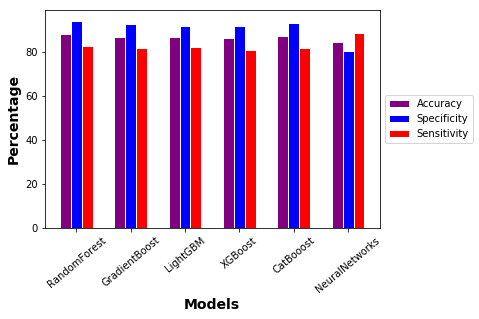

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

barWidth = 0.2
acc = [88.3, 87, 86.9, 86.2, 87.2, 84.7]
specificity = [94.2, 92.7, 91.6, 91.6, 93.2, 80.5]
sensitivity = [82.8, 81.7, 82.4, 81.1, 81.6, 88.7]

r1 = np.arange(len(acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, acc, color='purple', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, specificity, color='blue', width=barWidth, edgecolor='white', label='Specificity')
plt.bar(r3, sensitivity, color='red', width=barWidth, edgecolor='white', label='Sensitivity')
 
# Add xticks on the middle of the group bars
plt.ylabel('Percentage', fontweight='bold',size=14)
plt.xlabel('Models', fontweight='bold',size=14)
plt.xticks([r + barWidth for r in range(len(acc))], ['RandomForest', 'GradientBoost',
                                                     'LightGBM', 'XGBoost', 'CatBooost', 'NeuralNetworks']
           , rotation=40)
 
# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()